In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
import random
from datasets import Dataset
from datasets import load_metric
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer


In [2]:
# # Define the path to your text file
# file_path_1 = "/home/fanminzhi/esm_pdbs/sequence.txt"
# classification_path_1 = "/home/fanminzhi/esm_pdbs/ss.txt"
# file_path_2 = "/home/fanminzhi/rcsb_pdbs/sequence.txt"
# classification_path_2 = "/home/fanminzhi/rcsb_pdbs/ss.txt"
# file_path_3 = "/home/fanminzhi/esm_pdbs/sequence_2.txt"
# classification_path_3 = "/home/fanminzhi/esm_pdbs/ss_2.txt"
# # Read the file
# with open(file_path_1, 'r') as file:
#     lines_1 = file.readlines()
# with open(file_path_2, 'r') as file:
#     lines_2 = file.readlines()
# with open(file_path_3, 'r') as file:
#     lines_3 = file.readlines()

# ss_df_1 = pd.read_csv(classification_path_1, header=None, names=['alpha_helix', 'beta_sheet'])
# ss_df_2 = pd.read_csv(classification_path_2, header=None, names=['alpha_helix', 'beta_sheet'])
# ss_df_3 = pd.read_csv(classification_path_3, header=None, names=['alpha_helix', 'beta_sheet'])

# Process lines to remove the leading '>' character
# lines_11 = [line.strip() for line in lines_1 if line.startswith('>')]
# lines_22 = [line.strip() for line in lines_2 if line.startswith('>')]
# lines_33 = [line.strip() for line in lines_3 if line.startswith('>')]

# lines = lines_11 + lines_22 + lines_33
# lines = [line[1:] if line.startswith('>') else line for line in lines]

# # Create a pandas DataFrame
# df = pd.DataFrame(lines, columns=['data'])
# ss_df = pd.concat([ss_df_1, ss_df_2, ss_df_3], ignore_index=True)
# df['alpha_helix'] = ss_df['alpha_helix']
# df['beta_sheet'] = ss_df['beta_sheet']
# df.to_csv('protein_classification.csv')

In [3]:
df = pd.read_csv("protein_classification.csv", index_col=0)

In [4]:
df

,data,alpha_helix,beta_sheet
0,MKIVLKQVGHYKRDTFLTMGLTALEVVMEILLPFITAIIIDDGLKQ...,65.46,10.54
1,MDIFDGLTALGGLCLFLFGMQIMAEALQRRAGGRLEGLLRRMTRSR...,82.84,0.35
2,MQEQYRPEDIESNVQLHWQEKQTFKVTEDDSKEKYYCLSMLPYPSG...,39.77,23.37
3,MKNNNWYRTAIFYELYVRAFCDSNADGWGDLRGMAEKLDYLKKLGV...,33.40,16.98
4,MSTSVALDIDQYAINIAKGLIMDTVRKADSGHTGGPLSSMDYTYTL...,45.84,13.92
...,...,...,...
56579,MLYDFLMLLRRYKVSSVLNIAGMGLAFAAAYLMLVQVVFDFSYNRS...,52.89,17.09
56580,MDREMIIVLDFGGQYNQLIARRVRECNVYCEVHPYNLGLDKIREMN...,36.45,24.17
56581,MKFQFDNRLTNELPEDTLAAQGHMQPRLVQHAVWSATQPAAVAAPR...,47.54,16.10
56582,MAIQEDNLLKTIISHAKEYGFIFPSSEIYDGLSAVYDYGQNGAELK...,43.00,24.90


In [5]:
sum(df.data.apply(len) > 1024)

1747

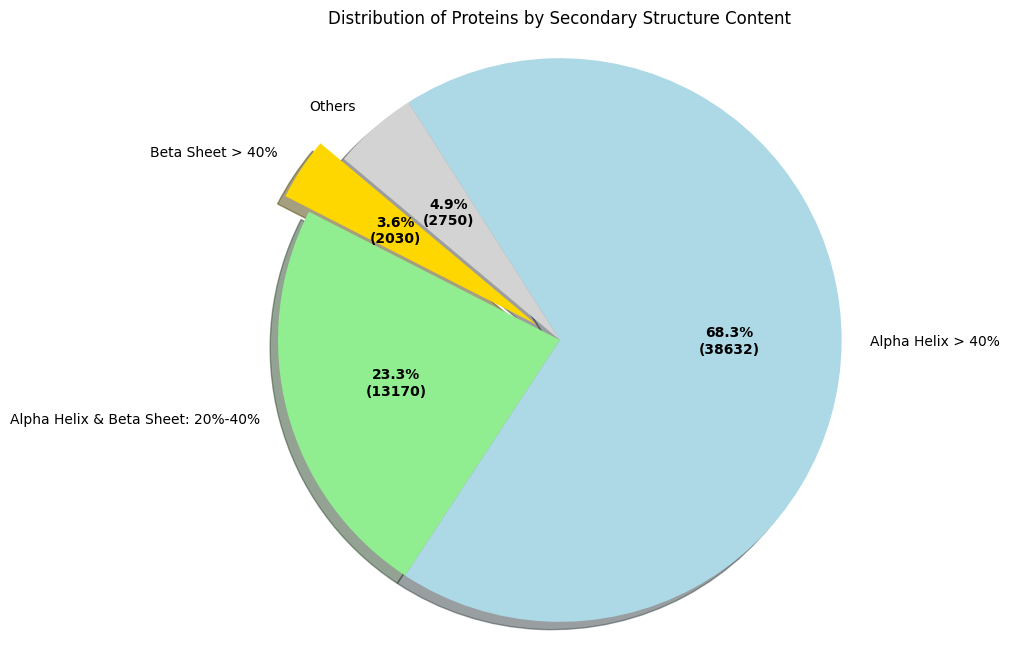

In [6]:

# Assuming 'df' is your DataFrame and it contains 'alpha_helix' column as well.

# Define the conditions
condition1 = df['beta_sheet'] > 40
condition2 = (df['beta_sheet'] <= 40) & (df['beta_sheet'] >= 20) & \
             (df['alpha_helix'] <= 40) & (df['alpha_helix'] >= 20)
condition3 = df['alpha_helix'] > 40
condition4 = ~(condition1 | condition2 | condition3)  # Represents all other proteins

# Calculate the counts
beta_sheet_gt_40_count = df[condition1].shape[0]
around_same_percentage_count = df[condition2].shape[0]
alpha_helix_gt_40_count = df[condition3].shape[0]
other_proteins_count = df[condition4].shape[0]

# Data to plot
labels = ['Beta Sheet > 40%', 'Alpha Helix & Beta Sheet: 20%-40%', 'Alpha Helix > 40%', 'Others']
sizes = [beta_sheet_gt_40_count, around_same_percentage_count, alpha_helix_gt_40_count, other_proteins_count]
colors = ['gold', 'lightgreen', 'lightblue', 'lightgrey']
explode = (0.1, 0, 0, 0)  # explode the 1st slice for emphasis

# Custom function to format the label with actual numbers and percentages
def func(pct, allsizes):
    absolute = int(pct/100.*np.sum(allsizes))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Plot
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                                   autopct=lambda pct: func(pct, sizes),
                                   shadow=True, startangle=140)

plt.title('Distribution of Proteins by Secondary Structure Content')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.

plt.setp(autotexts, size=10, weight="bold")  # Set the font size and weight for autopct

# Show plot
plt.show()

In [7]:
beta_labels = [int(value) for value in df.beta_sheet > 40]

In [8]:
sequences = df.data.to_list()
labels = beta_labels

# Quick check to make sure we got it right
len(sequences) == len(labels)

True

In [9]:
# all_less_than_1024 = all(len(s) < 1024 for s in sequences)

# # Print the result
# print("All strings are less than 1024 characters:", all_less_than_1024)

In [10]:
train_sequences, test_sequences, train_labels, test_labels = train_test_split(sequences, labels, test_size=0.25, shuffle=True)

In [11]:
sum(train_labels), sum(test_labels)

(1511, 520)

In [12]:
# model_checkpoint = "facebook/esm2_t36_3B_UR50D"
# model_checkpoint = "facebook/esm2_t33_650M_UR50D"
# model_checkpoint = "facebook/esm2_t30_150M_UR50D"
model_checkpoint = "facebook/esm2_t12_35M_UR50D"
# model_checkpoint = "facebook/esm2_t6_8M_UR50D"

In [13]:
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [14]:
tokenizer(train_sequences[random.randint(0, len(train_sequences))])

{'input_ids': [0, 20, 5, 15, 9, 12, 15, 18, 9, 12, 15, 5, 10, 9, 9, 4, 15, 15, 6, 7, 13, 5, 4, 5, 13, 5, 7, 15, 7, 11, 4, 6, 14, 15, 6, 10, 17, 7, 12, 12, 9, 15, 15, 18, 6, 5, 14, 21, 12, 11, 15, 13, 6, 7, 8, 7, 5, 10, 9, 7, 9, 4, 9, 13, 14, 18, 16, 17, 20, 6, 5, 16, 4, 7, 15, 9, 7, 5, 8, 15, 11, 6, 13, 13, 5, 6, 13, 6, 11, 11, 11, 5, 11, 7, 4, 5, 16, 8, 12, 12, 17, 7, 6, 4, 15, 17, 7, 5, 5, 6, 5, 17, 14, 20, 13, 4, 15, 10, 6, 12, 13, 15, 5, 7, 5, 15, 7, 7, 9, 11, 12, 10, 17, 20, 5, 9, 14, 7, 6, 13, 13, 18, 15, 15, 12, 9, 13, 7, 5, 10, 12, 8, 5, 17, 17, 13, 9, 5, 12, 6, 15, 4, 12, 5, 9, 5, 20, 15, 15, 7, 15, 15, 9, 6, 7, 12, 11, 7, 13, 9, 5, 15, 6, 11, 9, 11, 11, 7, 13, 12, 7, 9, 6, 20, 16, 18, 13, 10, 6, 19, 12, 8, 14, 19, 18, 7, 11, 8, 14, 9, 15, 20, 9, 23, 7, 20, 9, 17, 14, 19, 12, 4, 12, 19, 13, 15, 15, 12, 8, 17, 4, 15, 13, 20, 4, 14, 12, 4, 9, 11, 11, 5, 16, 8, 6, 10, 14, 4, 4, 12, 12, 5, 9, 13, 7, 13, 16, 9, 5, 4, 5, 11, 4, 7, 7, 17, 10, 4, 10, 6, 8, 4, 15, 7, 23, 5, 7, 15, 5, 1

In [15]:
train_tokenized = tokenizer(train_sequences, truncation=True)
test_tokenized = tokenizer(test_sequences, truncation=True)

In [16]:
train_dataset = Dataset.from_dict(train_tokenized)
test_dataset = Dataset.from_dict(test_tokenized)

train_dataset

Dataset({
    features: ['input_ids', 'attention_mask'],
    num_rows: 42438
})

In [17]:
train_dataset = train_dataset.add_column("labels", train_labels)
test_dataset = test_dataset.add_column("labels", test_labels)
train_dataset

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 42438
})

In [18]:
num_labels = max(train_labels + test_labels) + 1  # Add 1 since 0 can be a label
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)

Some weights of EsmForSequenceClassification were not initialized from the model checkpoint at facebook/esm2_t12_35M_UR50D and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
model_name = model_checkpoint.split("/")[-1]
batch_size = 6

args = TrainingArguments(
    f"{model_name}-finetuned-beta-sheet-jan22-more",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=10,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="recall",
    push_to_hub=False,
)

In [20]:
metric = load_metric("recall.py")
# metric = load_metric("accuracy.py")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references=labels)

/tmp/ipykernel_2593/1282703960.py:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("recall.py")
/home/ps/miniconda3/envs/protein/lib/python3.10/site-packages/datasets/load.py:848: FutureWarning: The repository for recall contains custom code which must be executed to correctly load the metric. You can inspect the repository content at recall.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [21]:
trainer = Trainer(
    model,
    args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [22]:
trainer.train()

/home/ps/miniconda3/envs/protein/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 